# Assignment 2 - Classification of Business Reviews

**Submission deadline: Friday 27 April 2018, 11pm**

**Penalty for late submission: 4 marks per day**

**Assessment marks: 20 marks (20% of the total unit assessment)**

The following code reads business reviews which are part of the [Yelp Dataset stored in Kaggle](https://www.kaggle.com/yelp-dataset/yelp-dataset). The data are stored in a CSV file. The following code reads the CSV file and prints the contents of the first 5 records:

In [1]:
import pandas as pd
pd_data = pd.read_csv('yelp_review.zip')
pd_data[:5]

,review_id,user_id,business_id,stars,date,text,useful,funny,cool
0,vkVSCC7xljjrAI4UGfnKEQ,bv2nCi5Qv5vroFiqKGopiw,AEx2SYEUJmTxVVB18LlCwA,5,2016-05-28,Super simple place but amazing nonetheless. It...,0,0,0
1,n6QzIUObkYshz4dz2QRJTw,bv2nCi5Qv5vroFiqKGopiw,VR6GpWIda3SfvPC-lg9H3w,5,2016-05-28,Small unassuming place that changes their menu...,0,0,0
2,MV3CcKScW05u5LVfF6ok0g,bv2nCi5Qv5vroFiqKGopiw,CKC0-MOWMqoeWf6s-szl8g,5,2016-05-28,Lester's is located in a beautiful neighborhoo...,0,0,0
3,IXvOzsEMYtiJI0CARmj77Q,bv2nCi5Qv5vroFiqKGopiw,ACFtxLv8pGrrxMm6EgjreA,4,2016-05-28,Love coming here. Yes the place always needs t...,0,0,0
4,L_9BTb55X0GDtThi6GlZ6w,bv2nCi5Qv5vroFiqKGopiw,s2I_Ni76bjJNK9yG60iD-Q,4,2016-05-28,Had their chocolate almond croissant and it wa...,0,0,0


From the data, we will only use the reviews and the star rating. The following code extracts this information and places it in a list of pairs:

In [2]:
all_data = list(zip(pd_data['text'], pd_data['stars']))

In [3]:
len(all_data)

5261668

In [4]:
all_data[:5]

[("Super simple place but amazing nonetheless. It's been around since the 30's and they still serve the same thing they started with: a bologna and salami sandwich with mustard. \n\nStaff was very helpful and friendly.",
  5),
 ("Small unassuming place that changes their menu every so often. Cool decor and vibe inside their 30 seat restaurant. Call for a reservation. \n\nWe had their beef tartar and pork belly to start and a salmon dish and lamb meal for mains. Everything was incredible! I could go on at length about how all the listed ingredients really make their dishes amazing but honestly you just need to go. \n\nA bit outside of downtown montreal but take the metro out and it's less than a 10 minute walk from the station.",
  5),
 ("Lester's is located in a beautiful neighborhood and has been there since 1951. They are known for smoked meat which most deli's have but their brisket sandwich is what I come to montreal for. They've got about 12 seats outside to go along with the insi

Let's now check the distribution of star ratings:

In [5]:
%matplotlib inline
from matplotlib import pyplot as plt

In [6]:
from collections import Counter
c = Counter([rating for text, rating in all_data])
c

Counter({1: 731363, 2: 438161, 3: 615481, 4: 1223316, 5: 2253347})

<Container object of 5 artists>

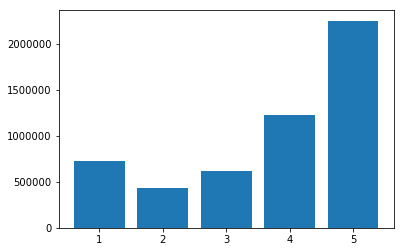

In [7]:
plt.bar(range(1,6), [c[1], c[2], c[3], c[4], c[5]])

**In this assignment you will predict whether a particular review gives 5 stars or not.**

The data set is fairly large with more than 5 million samples. To speed up the computations for this assigmnent, we will use 500,000 samples for training,  10,000 for the dev-test set and 10,000 for the test set. To reduce any possible bias while partitioning the data set, we will first shuffle the data and then partition into training data, dev-test data, and test data using the following code:

In [8]:
import random
random.seed(1234)
random.shuffle(all_data)
train_data, devtest_data, test_data = all_data[:500000], all_data[500000:510000], all_data[510000:520000]

## Exercise 1 (1 mark)
The data are annotated with a star rating. In this assignment we will attempt to predict whether the review has 5 stars or not. In other words, we will use two categories: "it does not have 5 stars", and "it has 5 stars". According to these categories, check that the training data, devtest data and test data have the same proportions of the categories "it does not have 5 stars", and "it has 5 stars".

## Exercise 2 (2 marks)
Use sklearn to generate the tf.idf matrix of the training set. With this matrix, train an sklearn Naive Bayes classifier using the training set and report the F1 scores of the training set, the devtest set, and the set set.

## Exercise 3 (2 marks)
Logistic regression normally produces better results than Naive Bayes but it takes longer time to train. Look at the [documentation of sklearn](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html) and train a logistic regression classifier using the same tfidf information as in exercise 2. Report the F1 scores of the training set, the devtest set, and the test set.

## Exercise 4 (4 marks)
Given the results obtained in the previous exercises, answer the following questions. You must justify all answers.
1. (1 mark) How much overfitting did you observe in the classifiers?
2. (1 mark) What would you do to reduce overfitting?
3. (1 mark) Which classifier is better?
4. (1 mark) What can you conclude from the differences in the results between the dev-test set and the test set?

(write your answer here using [Markdown formatting](http://jupyter-notebook.readthedocs.io/en/stable/examples/Notebook/Working%20With%20Markdown%20Cells.html))

## Exercise 5 (2 marks)
Write code that counts the false positives and false negatives of the training set of each classifier. What can you conclude from such counts?

## Exercise 6 (9 marks) - Improve the System and Final Analysis
This exercise is open ended. Your goal is to perform a more detailed error analysis and identify ways to improve the classification of reviews **by adding or changing the features**. To obtain top marks in this part, your answer must address all of the following topics:

1. An error analysis of the previous systems.
2. Based on the error analysis, explain what sort of modifications you would want to implement, and justify why these would be useful modifications.
3. Implementation of the improved classifier.
4. Evaluation of the results and comparison with the previous classifiers. What system is best and why?
5. Explain what further changes would possibly improve the classifier and why.

All this information should be inserted in this notebook below this question. The information should be structured in sections and it must be clear and precise. The explanations should be convincing. Below is a possible list of section headings. These sections are just a guideline. Feel free to change them, but make sure that they are informative and relevant.

** Note that, even if the new system might not obtain better results than the previous systems, you can obtain top marks if you perform a good error analysis of the initial systems and the final system and you give a sensible justification of the decisions that led you to implement the new system. Similarly, you may not obtain top marks if you present a system that improves on the results but you do not provide a good error analysis or you do not justify your choice of new system. **

### 1. Error Analysis

(write your text here)

### 2. Explanation of the Proposed New Classifier

(write your text here)

### 3. Code of the Proposed New Classifier

(write your text here)

### 4. Evaluation and Comparison

(write your text here)

### 5. Final Conclusions and Possible Improvements

(write your text here)

# Submission of Results

Your submission should consist of this Jupyter notebook with all your code and explanations inserted in the notebook. The notebook should contain the output of the runs so that it can be read by the assessor without needing to run the code.

Examine this notebook so that you can have an idea of how to format text for good visual impact. You can also read this useful [guide to the markdown notation](http://daringfireball.net/projects/markdown/syntax), which explains the format of the text.

Late submissions will have a penalty of **4 marks deduction per day late**.

Each question specifies a mark. The final mark of the assignment is the sum of all the individual marks, after applying any deductions for late submission.

By submitting this assignment you are acknowledging that this is your own work. Any submissions that break the code of academic honesty will be penalised as per the [academic honesty policy](https://staff.mq.edu.au/work/strategy-planning-and-governance/university-policies-and-procedures/policies/academic-honesty).